In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.impute import KNNImputer
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
file_path = '/content/Updated_Season2_with_Polar - Merged_Season.csv'
df = pd.read_csv(file_path)
print(df.shape)

(6222, 115)


In [ ]:
#To remove the rows where all the values are null
df = df.dropna(how='all')

In [ ]:
print(df.shape)

(3111, 115)


In [ ]:
data = pd.DataFrame(df)

In [ ]:
for column in data.columns:
    print(f"Column '{column}': {data[column].isna().sum()} null values")

for column in data.columns:
      if data[column].dtype == 'object':
        data.drop(column, axis=1, inplace=True)

In [ ]:
print(df.shape)
data.to_csv('cleaned_data_2_0.csv', index=False)

(3111, 115)


In [ ]:
X = data.values
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X)
data_imputed = pd.DataFrame(X_imputed, columns=data.columns)
print("Original Data:")
print(data.head())
print("\nImputed Data:")
print(data_imputed.head())

Original Data:
    RHR    HRV  Recovery  Sleep.Score  Hours.in.Bed  Hours.of.Sleep  \
1  51.0  129.0      73.0        100.0          9.81            9.05   
3   NaN    NaN       NaN          NaN           NaN             NaN   
5  65.0  120.0      71.0         94.0          8.62            7.82   
7  52.0  107.0      83.0         85.0          8.14            7.22   
9  53.0   51.0      76.0         76.0          8.86            6.99   

   Sleep.Need  Sleep.Efficiency....  Wake.Periods  Sleep.Disturbances  ...  \
1        9.06                  92.0          12.0                 9.0  ...   
3         NaN                   NaN           NaN                 NaN  ...   
5        8.32                  91.0          16.0                14.0  ...   
7        8.46                  89.0          11.0                 9.0  ...   
9        9.25                  79.0          27.0                17.0  ...   

   Peak Power CoV  Peak Power/BM Mean  Peak Power/BM SD  Peak Power/BM CoV  \
1          

In [ ]:
data_imputed.to_csv('cleaned_imputed_data_2_0.csv', index=False)

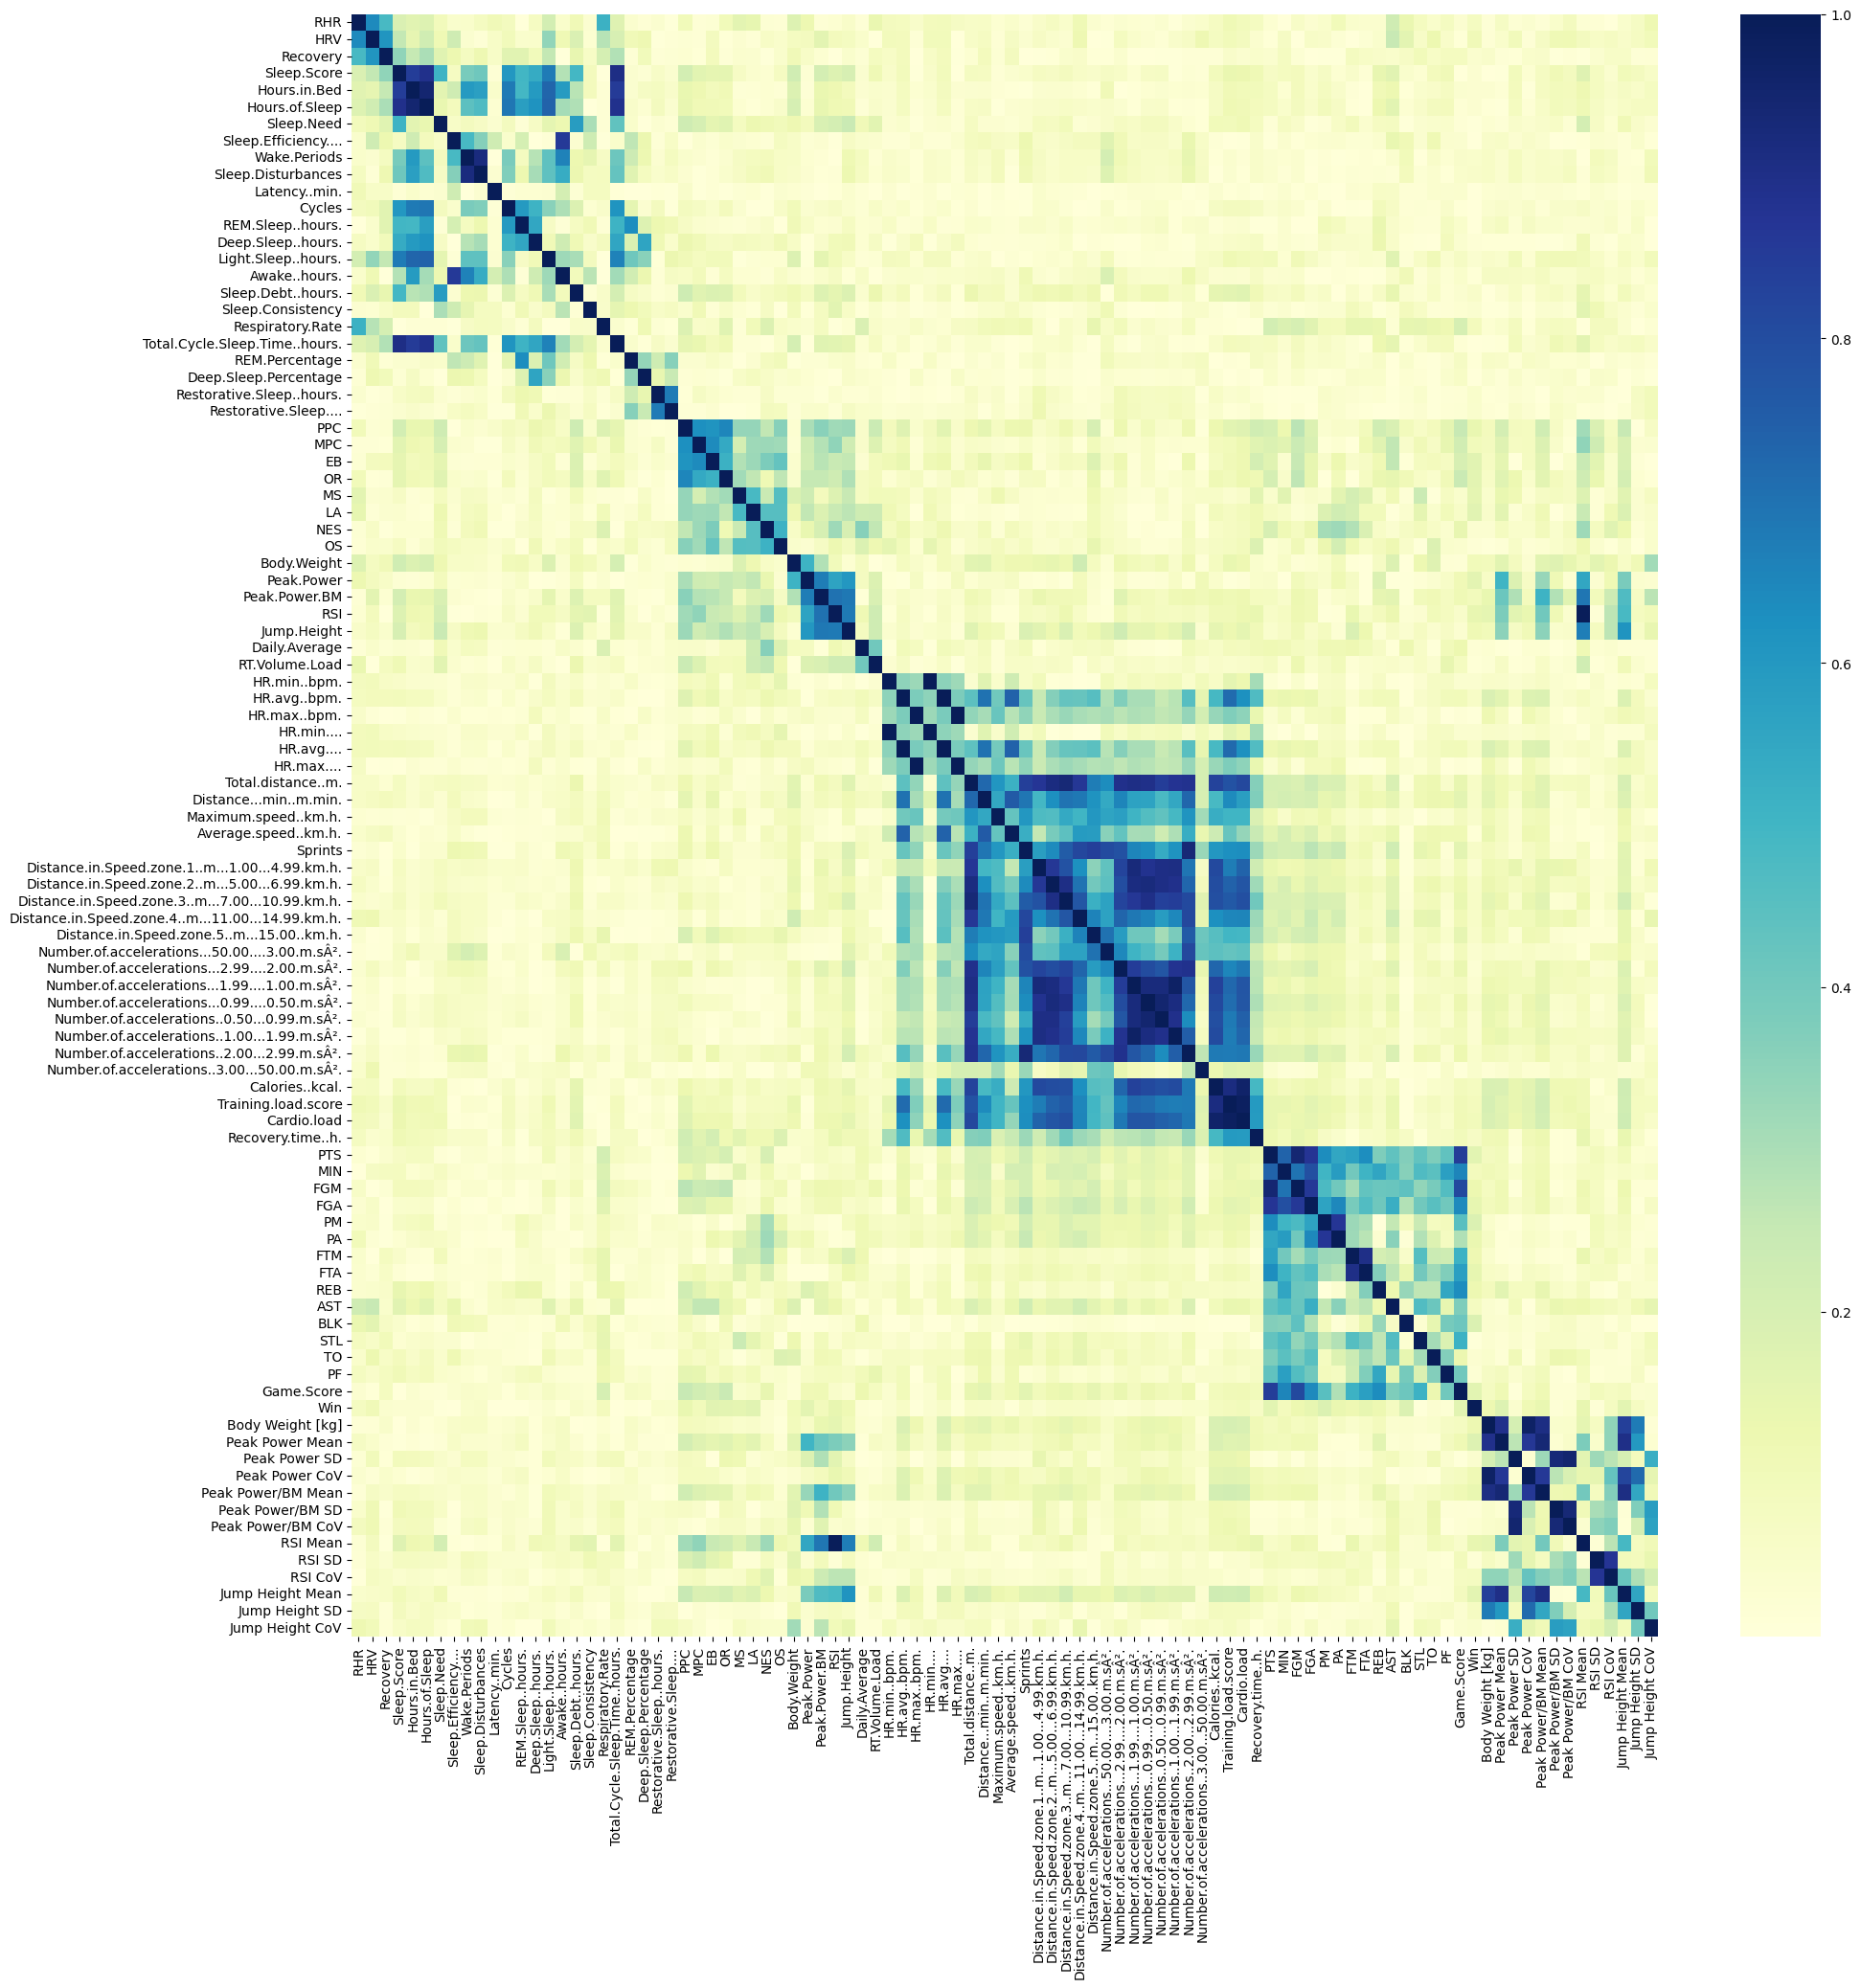

In [ ]:
fig = plt.figure(figsize=(22,22))

# plotting correlation heatmap
dataplot = sb.heatmap(data_imputed.corr().abs(), cmap="YlGnBu", annot=False)

# displaying heatmap
mp.show()

In [ ]:

def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


df = pd.read_csv('/content/cleaned_imputed_data_2_0.csv')

# Select only the columns containing numerical data
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize each numerical column using min-max scaling
for column in numeric_columns:
    df[column] = min_max_scaling(df[column])

# Save the normalized data back to a CSV file
df.to_csv("normalized_data.csv", index=False)


In [ ]:
data_2 = pd.read_csv('/content/normalized_data.csv')
# Identify highly correlated features
threshold = 0.7  # Define your threshold for correlation
correlation_matrix = data_2.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop highly correlated features
data_filtered = data_2.drop(columns=high_correlation_cols)

# Save the filtered data
data_filtered.to_csv('cleaned_normalized_53.csv', index=False)


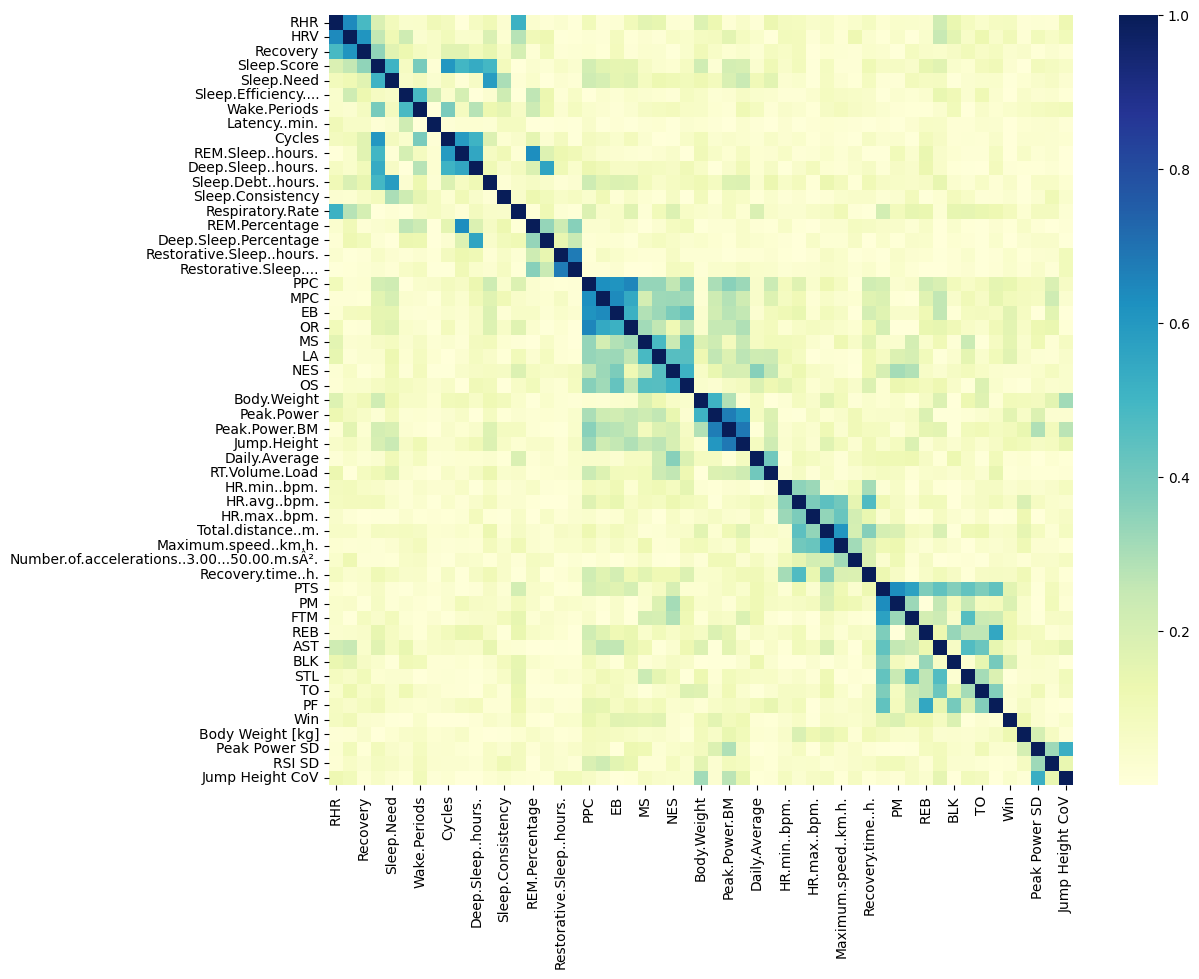

In [ ]:
fig = plt.figure(figsize=(12,10))

# plotting correlation heatmap
dataplot = sb.heatmap(data_filtered.corr().abs(), cmap="YlGnBu", annot=False)

# displaying heatmap
mp.show()

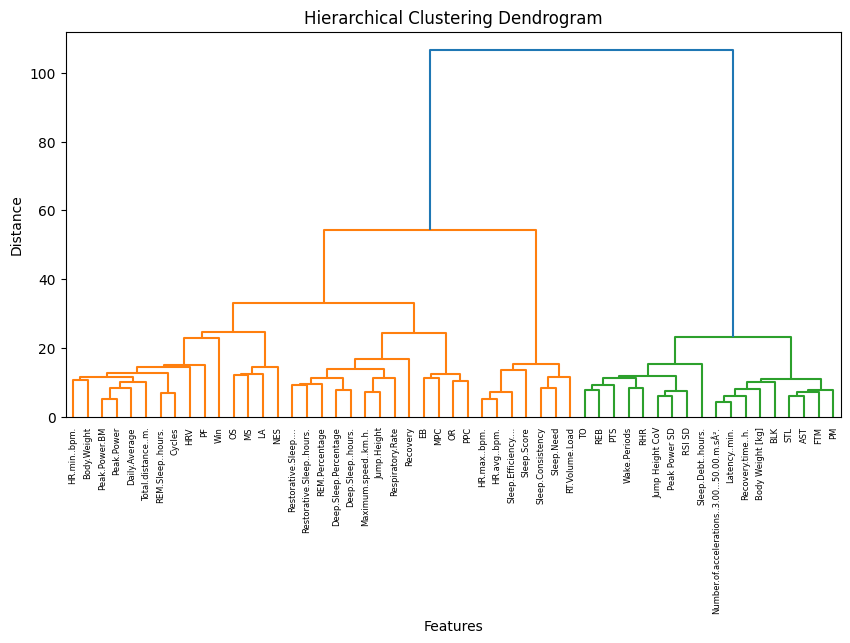

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define your dataset with features
data = pd.read_csv('/content/cleaned_normalized_53.csv')

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform hierarchical clustering
linked = linkage(df.T, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           labels=df.columns,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA


data = pd.read_csv('/content/cleaned_normalized_53.csv')

# Define features for each modality
sleep_features = ['Sleep.Score', 'Sleep.Need', 'Sleep.Efficiency....', 'Latency..min.', 'Cycles', 'REM.Sleep..hours.',
                  'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Sleep.Consistency', 'Restorative.Sleep..hours.',
                  'Restorative.Sleep....', 'Recovery.time..h.']

training_features = ['Daily.Average', 'RT.Volume.Load', 'PTS', 'PM', 'FTM', 'REB', 'AST', 'BLK', 'STL', 'TO', 'PF']

cardiac_features = ['RHR', 'HRV', 'Respiratory.Rate', 'HR.min..bpm.', 'HR.avg..bpm.', 'HR.max..bpm.']

jump_features = ['Peak.Power', 'Peak.Power.BM', 'Jump.Height', 'Maximum.speed..km.h.']

cognitive_features = ['RSI SD', 'Jump Height CoV', 'MS', 'LA', 'NES', 'OS']

# Combine features for each modality
sleep_data = data[sleep_features]
training_data = data[training_features]
cardiac_data = data[cardiac_features]
jump_data = data[jump_features]
cognitive_data = data[cognitive_features]

# Performing PCA for each modality
pca_sleep = PCA(n_components=1)
pca_training = PCA(n_components=1)
pca_cardiac = PCA(n_components=1)
pca_jump = PCA(n_components=1)
pca_cognitive = PCA(n_components=1)

sleep_pca_result = pca_sleep.fit_transform(sleep_data)
training_pca_result = pca_training.fit_transform(training_data)
cardiac_pca_result = pca_cardiac.fit_transform(cardiac_data)
jump_pca_result = pca_jump.fit_transform(jump_data)
cognitive_pca_result = pca_cognitive.fit_transform(cognitive_data)

# Create DataFrames for the PCA results
pca_sleep_df = pd.DataFrame(sleep_pca_result, columns=['Sleep_PC'])
pca_training_df = pd.DataFrame(training_pca_result, columns=['Training_PC'])
pca_cardiac_df = pd.DataFrame(cardiac_pca_result, columns=['Cardiac_PC'])
pca_jump_df = pd.DataFrame(jump_pca_result, columns=['Jump_PC'])
pca_cognitive_df = pd.DataFrame(cognitive_pca_result, columns=['Cognitive_PC'])

# Concatenate the PCA results into a single DataFrame
pca_combined_df = pd.concat([pca_sleep_df, pca_training_df, pca_cardiac_df, pca_jump_df, pca_cognitive_df], axis=1)

# Write the PCA result to a new CSV file
pca_combined_df.to_csv('pca_modalities_result.csv', index=False)


PCA modalities result saved to pca_modalities_result.csv


In [ ]:
data5 = pd.DataFrame(pca_combined_df)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = data5.iloc[:, :-1]
y = data5.iloc[:, -1]

# Createing linear regression model
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)

# Calculating the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculating the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Print the model coefficients
print("Model Coefficients:", linreg.coef_)

Mean Squared Error (MSE): 0.09899602744170607
Root Mean Squared Error (RMSE): 0.3146363415781878
Model Coefficients: [-0.05071054  0.02875752  0.08307272 -0.50614135]


In [ ]:
#Predicitng score on PCA features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = pd.read_csv('/content/pca_modalities_result.csv')

# Assuming that the last column is the target variable and the first 5 columns are the PCA features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model and calcultaing the MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predicting performance score for each entry
predictions = model.predict(X)
data['Predicted Performance Score'] = predictions

# Downloading the dataset with the predicted score
data.to_csv('predicted_scores.csv', index=False)

Mean Squared Error: 0.09138429292481473


In [ ]:
#MSE from 53 feature Data set
data5 = pd.read_csv('/content/cleaned_normalized_53.csv')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming your dataset is 'data'
# and the last column is the target variable

# Separate features (X) and target variable (y)
X = data5.iloc[:, :-1]  # All columns except the last one
y = data5.iloc[:, -1]   # Last column

# Create and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X, y)

# Make predictions on the same data
y_pred = linreg.predict(X)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

print("Model Coefficients:", linreg.coef_)

Mean Squared Error (MSE): 0.005070322588259286
Root Mean Squared Error (RMSE): 0.07120619768151706
Model Coefficients: [ 5.14144083e-02  1.79634480e-02 -9.00274574e-03  2.91155968e-02
 -4.24407493e-02  2.44462726e-02 -4.51535701e-02 -3.14076732e-02
  1.58745541e-02 -9.05396290e-03 -5.33634761e-05  1.10837564e-02
 -2.21726266e-02  1.69807923e-02  2.95107764e-02 -2.92487060e-02
 -1.72866655e-02 -3.88345479e-02  8.27526113e-02 -1.05449544e-01
  7.39741707e-03 -2.91975250e-02 -2.33276617e-02 -3.45319643e-02
 -5.14499457e-03  3.04013574e-02  1.71089416e+00 -3.52069589e+00
  3.44596417e+00 -4.67120484e-01  5.09750453e-02  8.31502140e-04
  3.79440537e-02  1.91658230e-03 -5.28404727e-02  6.22860603e-02
 -4.82336260e-02  1.87991321e-02 -5.01978392e-02  8.85850886e-02
 -6.48439629e-02  1.02596822e-02 -3.47767348e-02  1.04987265e-01
  2.01371802e-02 -4.34704999e-02 -4.90391169e-02 -4.69967588e-02
 -1.20031086e-02  1.10757280e-01  4.83860682e-01  4.39591498e-02]


In [ ]:
#Predicitng score from 53 features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = pd.read_csv('/content/cleaned_normalized_53.csv')

# Assuming that the last column is the target variable and the first 5 columns are the PCA features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model and calcultaing the MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predicting performance score for each entry
predictions = model.predict(X)
data['Predicted Performance Score'] = predictions

# Downloading the dataset with the predicted score
data.to_csv('predicted_scores_53.csv', index=False)

Mean Squared Error: 0.005288121215415696
